In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df1=df.drop(['area_type','availability', 'society', 'balcony'],axis='columns')
df1.head(20)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df2=df1.dropna()

In [13]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df2.shape

(13246, 5)

In [16]:
df2['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [17]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split()[0]))

In [19]:
df3=df2.drop(['size'],axis=1)

In [20]:
df4=df3.dropna()

In [21]:
df_encoded=pd.get_dummies(df4,columns=['location'],drop_first=True)

In [23]:
def convert_sqft_to_num(sqft):
    parts = sqft.split('-')
    if len(parts) == 2:
       return (float(parts[0]) + float(parts[1])) / 2
    try:
        return float(sqft)
    except:
        return None # Return None for non-numeric or invalid values
df_encoded['total_sqft'] = df_encoded['total_sqft'].apply(convert_sqft_to_num)
df_encoded = df_encoded.dropna (subset=['total_sqft']) # Drop rows with invalid values

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_features=['total_sqft','bath','bhk']
df_encoded[numeric_features]=scaler.fit_transform(df_encoded[numeric_features])

In [26]:
X=df_encoded.drop('price',axis=1) # Features
y=df_encoded['price'] # Target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression


In [28]:
model=LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [32]:
# print error matrics
print('mean absolute error',mae)
print('mean sqaured error',mse)
print('root mean squared error',rmse)

mean absolute error 89501307052.07086
mean sqaured error 1.2772091555374843e+24
root mean squared error 1130136786206.645


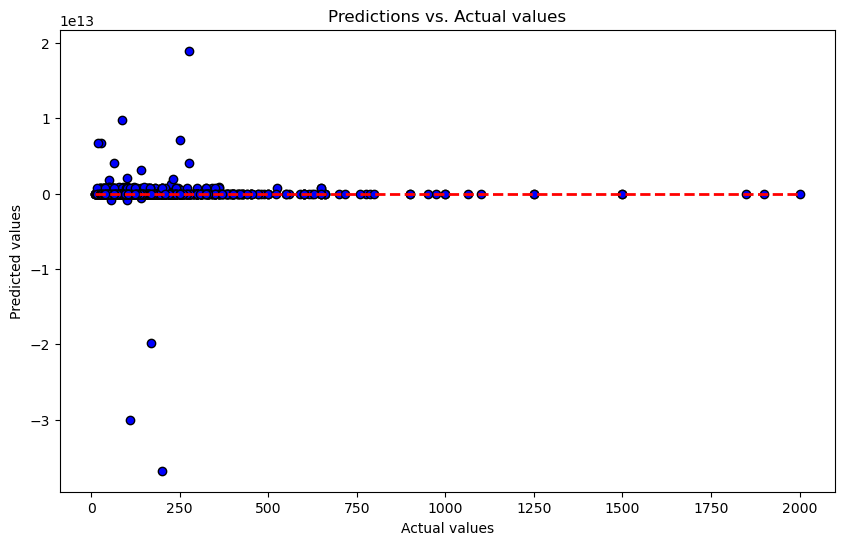

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Scatter plot of predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k') # Scatter plot with blue dots and black edges
# Diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predictions vs. Actual values")
plt.show()

In [38]:
# calculate residuals
residuals=y_test-y_pred

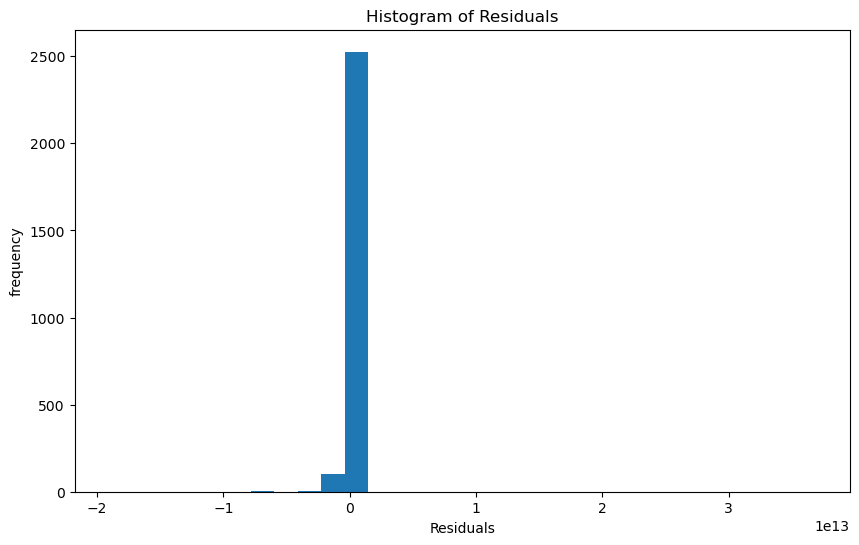

In [39]:
# histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals,bins=30)
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Histogram of Residuals')
plt.show()

In [43]:
# Coefficients and feature importance (if applicable)
if 'coef_' in model.__dict__:
    coefficients = model.coef_
    feature_names = X.columns
    importance = pd.Series(coefficients, index=feature_names)
    importance=importance.sort_values(ascending=False)
    print("Feature Importance:")
    print(importance)

Feature Importance:
location_ Sector 1 HSR Layout                               1.818626e+13
location_Amco Colony                                        8.963369e+12
location_1st Stage Radha Krishna Layout                     6.309210e+12
location_ Electronic City                                   5.923821e+12
location_1Hoysalanagar                                      3.321730e+12
                                                                ...     
location_2nd Block Hbr Layout                              -1.637048e+12
location_5 Bedroom Farm House in Lakshmipura               -3.374921e+12
location_1 Ramamurthy Nagar                                -2.062150e+13
location_ ittamadu                                         -3.090439e+13
location_12th cross srinivas nagar banshankari 3rd stage   -3.758545e+13
Length: 1306, dtype: float64


In [44]:
# interpret the result
print('Interpreting the results:')
print('-'*40)
print('mean absolute error',mae)
print('mean sqaured error',mse)
print('root mean squared error',rmse)
print('\n')

Interpreting the results:
----------------------------------------
mean absolute error 89501307052.07086
mean sqaured error 1.2772091555374843e+24
root mean squared error 1130136786206.645




In [45]:
# feature importance (if applicable)
if 'coef_' in model.__dict__:
    print('Feature Importance:')
    print('-'*40)
    print(importance)
    

Feature Importance:
----------------------------------------
location_ Sector 1 HSR Layout                               1.818626e+13
location_Amco Colony                                        8.963369e+12
location_1st Stage Radha Krishna Layout                     6.309210e+12
location_ Electronic City                                   5.923821e+12
location_1Hoysalanagar                                      3.321730e+12
                                                                ...     
location_2nd Block Hbr Layout                              -1.637048e+12
location_5 Bedroom Farm House in Lakshmipura               -3.374921e+12
location_1 Ramamurthy Nagar                                -2.062150e+13
location_ ittamadu                                         -3.090439e+13
location_12th cross srinivas nagar banshankari 3rd stage   -3.758545e+13
Length: 1306, dtype: float64


In [46]:
df2['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

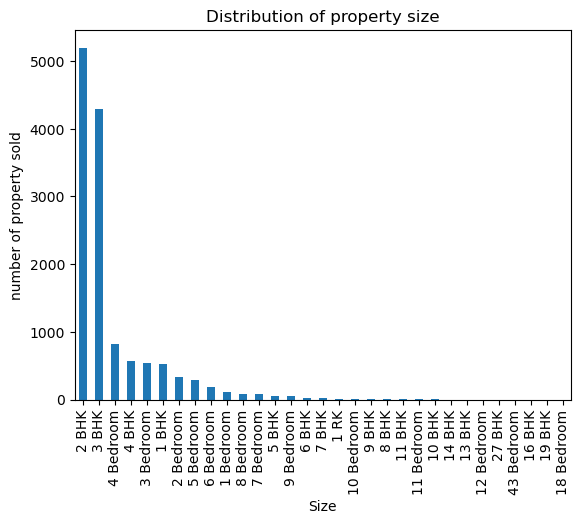

In [47]:
df2['size'].value_counts().plot(kind='bar')
plt.title('Distribution of property size')
plt.xlabel('Size')
plt.ylabel('number of property sold')
plt.show()

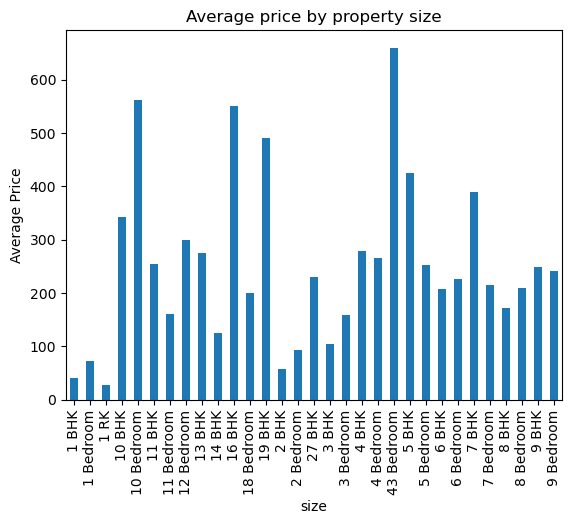

In [48]:
avg_price_by_size=df2.groupby('size')['price'].mean()
avg_price_by_size.plot(kind='bar')
plt.title('Average price by property size')
plt.xlabel('size')
plt.ylabel('Average Price')
plt.show()

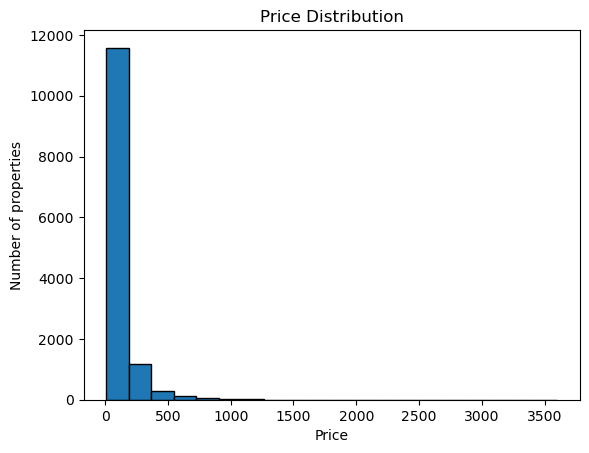

In [49]:
plt.hist(df2['price'],bins=20,edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of properties')
plt.show()

In [50]:
# drops rows with missing values
df3=df2.dropna()

In [51]:
# handle missing values
df3.fillna(0,inplace=True) # filling the missing values with 0

In [52]:
# convert categorical variable to numerical 
df4=pd.get_dummies(df3,columns=['size','total_sqft','bath'],drop_first=True)

In [53]:
# split features and target
X=df4.drop('price',axis=1)
y=df4['price']

In [54]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
scaler=StandardScaler()
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

In [56]:
# clean and format 'total_sqft' column
df['total_sqft']=df['total_sqft'].apply(pd.to_numeric,errors='coerce') # convert non-numeric values to NaN

In [57]:
df4.head()

,location,price,bhk,size_1 Bedroom,size_1 RK,size_10 BHK,size_10 Bedroom,size_11 BHK,size_11 Bedroom,size_12 Bedroom,...,bath_10.0,bath_11.0,bath_12.0,bath_13.0,bath_14.0,bath_15.0,bath_16.0,bath_18.0,bath_27.0,bath_40.0
0,Electronic City Phase II,39.07,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,120.00,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,62.00,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,95.00,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,51.00,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df4.columns

Index(['location', 'price', 'bhk', 'size_1 Bedroom', 'size_1 RK',
       'size_10 BHK', 'size_10 Bedroom', 'size_11 BHK', 'size_11 Bedroom',
       'size_12 Bedroom',
       ...
       'bath_10.0', 'bath_11.0', 'bath_12.0', 'bath_13.0', 'bath_14.0',
       'bath_15.0', 'bath_16.0', 'bath_18.0', 'bath_27.0', 'bath_40.0'],
      dtype='object', length=2117)

# final prediction

Mean Squared Error:65.36995137170021
R-squared:80.72059636181392


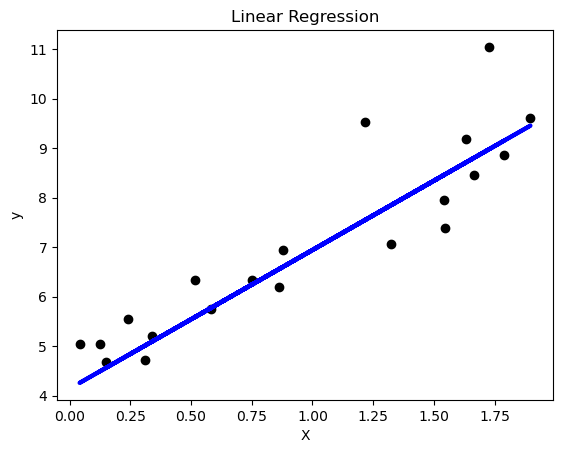

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
#Generate some random data for demonstration purposes
np.random.seed (42)
X=2*np.random.rand(100, 1)
y=4+3*X + np.random.randn(100, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)
# Make prediction on the test set
y_pred=model.predict(X_test)
#check performance metrics
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error:{mse*100}")
print(f"R-squared:{r2*100}")

# plot the regression line
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='Blue',linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()